In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install tensorflow-addons
import tensorflow_addons as tfa
from sklearn.model_selection import KFold, train_test_split
%load_ext tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 10.6 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


EfficientNet

In [ ]:
def get_model():
    #Create model
    base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights="imagenet", 
                                                  input_shape=(224, 224, 3), pooling='avg')
    out = base_model.output
    prediction = tf.keras.layers.Dense(1, activation="linear")(out)
    model = tf.keras.Model(inputs = base_model.input, outputs = prediction)
      
    return model

model = get_model()

16719872/16705208 [==============================] - 0s 0us/step


NewNet (RatherShort-DeepLearning)

In [4]:
def get_model():
    base_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(2,2), activation=None, input_shape=(224,224,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), activation=None, padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(3,3), strides=(2,2)),
        #tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Conv2D(filters=80, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(4, activation='relu'),
        #tf.keras.layers.Dropout(0.5),
        #tf.keras.layers.Dense(2, activation='relu'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
    ])

    out = base_model.output
    prediction = tf.keras.layers.Dense(1, activation="linear")(out)
    model = tf.keras.Model(inputs = base_model.input, outputs = prediction)
    
    return model

def get_model_name(k):
    return 'NewNet_'+str(k)+'.h5'

tf.test.gpu_device_name()

model = get_model()

In [5]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

activation_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[11].output)
activation_model.summary()

img_path = '/content/gdrive/MyDrive/Hasil_Train/20220427_132349 (2).png'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
activation = activation_model(img_tensor)

fig = plt.figure(figsize=(20,20))
#for i in range(9):
#    plt.subplot(4,4,i+1)
#    plt.imshow(activation[0,:,:,i])
#plt.show()

0 conv2d_input (None, 224, 224, 3)
1 conv2d (None, 110, 110, 16)
5 conv2d_1 (None, 54, 54, 32)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 110, 110, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 110, 110, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 110, 110, 16)      0         
                                                                 
 average_pooling2d (AverageP  (None, 54, 54, 16)       0         
 ooling2D)                                                       
                              

<Figure size 1440x1440 with 0 Axes>

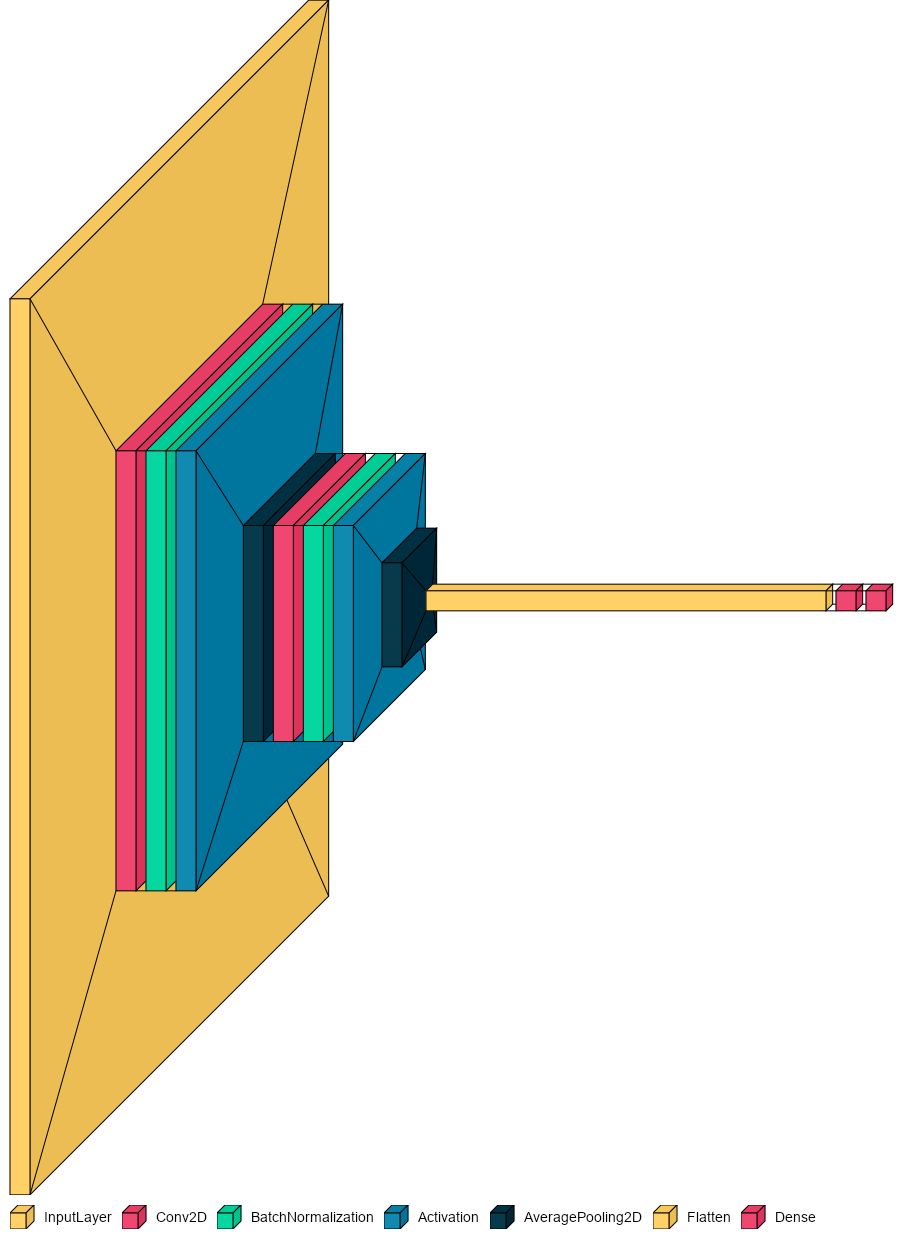

In [ ]:
#!pip install visualkeras
import visualkeras
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'blue'

model = get_model()

visualkeras.layered_view(model, color_map=color_map)
from PIL import ImageFont

font = ImageFont.load_default()  # using comic sans is strictly prohibited!
font_type = ImageFont.truetype("arial.ttf", 14)
visualkeras.layered_view(model, legend=True, font=font_type)  # font is optional!

In [ ]:
table=pd.DataFrame(columns=["Name","Type","Shape"])
for layer in model.layers:
    table = table.append({"Name":layer.name, "Type": layer.__class__.__name__,"Shape":layer.output_shape}, ignore_index=True)

In [ ]:
table.head(20)

,Name,Type,Shape
0,conv2d_input,InputLayer,"[(None, 224, 224, 3)]"
1,conv2d,Conv2D,"(None, 110, 110, 16)"
2,batch_normalization,BatchNormalization,"(None, 110, 110, 16)"
3,max_pooling2d,MaxPooling2D,"(None, 54, 54, 16)"
4,conv2d_1,Conv2D,"(None, 54, 54, 32)"
5,batch_normalization_1,BatchNormalization,"(None, 54, 54, 32)"
6,max_pooling2d_1,MaxPooling2D,"(None, 26, 26, 32)"
7,flatten,Flatten,"(None, 21632)"
8,dense,Dense,"(None, 64)"
9,dense_1,Dense,"(None, 1)"


In [ ]:
table=pd.DataFrame(columns=["Name","Type","Shape"])
for layer in model.layers:
    table = table.append({"Name":layer.name, "Type": layer.__class__.__name__,"Shape":layer.output_shape}, ignore_index=True)
table.tail(20)

,Name,Type,Shape
219,block6d_drop,Dropout,"(None, 7, 7, 192)"
220,block6d_add,Add,"(None, 7, 7, 192)"
221,block7a_expand_conv,Conv2D,"(None, 7, 7, 1152)"
222,block7a_expand_bn,BatchNormalization,"(None, 7, 7, 1152)"
223,block7a_expand_activation,Activation,"(None, 7, 7, 1152)"
224,block7a_dwconv,DepthwiseConv2D,"(None, 7, 7, 1152)"
225,block7a_bn,BatchNormalization,"(None, 7, 7, 1152)"
226,block7a_activation,Activation,"(None, 7, 7, 1152)"
227,block7a_se_squeeze,GlobalAveragePooling2D,"(None, 1152)"
228,block7a_se_reshape,Reshape,"(None, 1, 1, 1152)"
